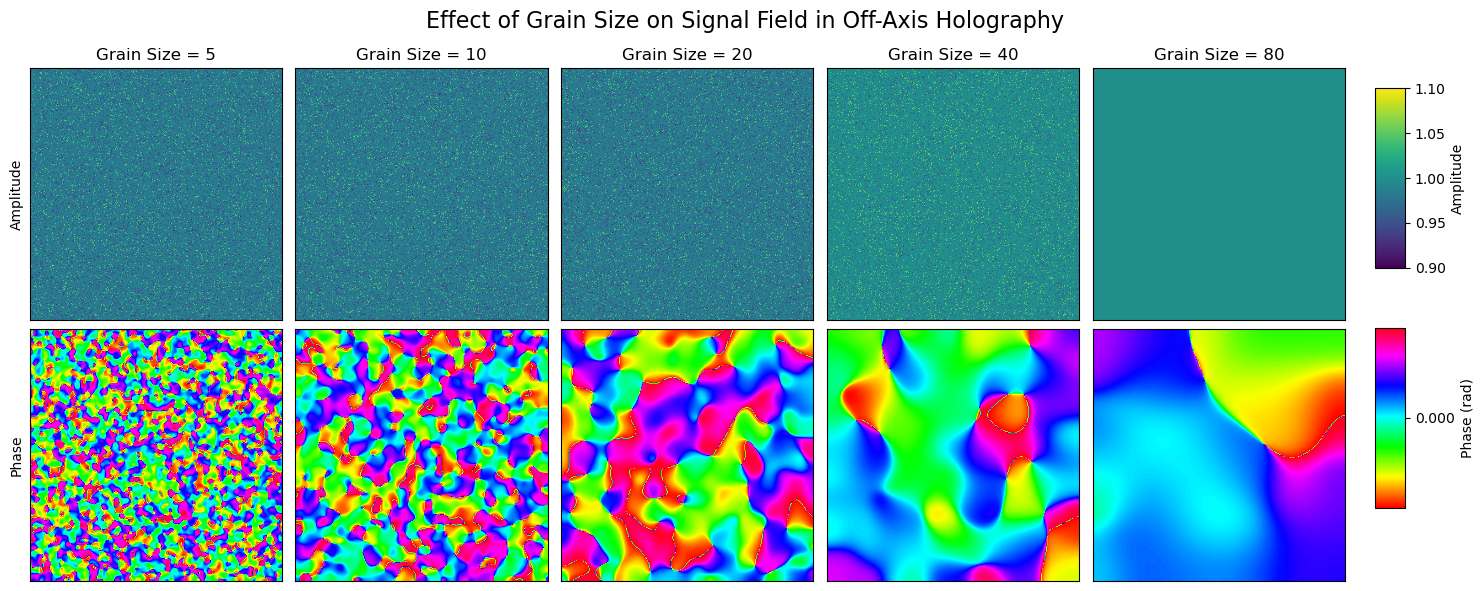

In [ ]:
import numpy as np



import matplotlib.pyplot as plt
from matplotlib import cm
import sys
import os
sys.path.append(os.path.abspath('..'))

from modules.grid import create_spatial_grid
from modules.field_generation import generate_speckle_field
from modules.visualisation import plot_complex_field

# Create grid
Nx, Ny = 300, 300
X, Y, xv, yv = create_spatial_grid(Nx, Ny)


grain_sizes = [5, 10, 20, 40, 80]


fig, axes = plt.subplots(2, len(grain_sizes), figsize=(15, 6))
fig.suptitle('Effect of Grain Size on Signal Field in Off-Axis Holography', fontsize=16)

# Generate and plot signal fields for each grain size
for i, grain_size in enumerate(grain_sizes):
    # Generate speckle field with current grain size
    signal_field = generate_speckle_field(Nx, Ny, grain_size)
    
    # Plot amplitude
    amp_ax = axes[0, i]
    im_amp = amp_ax.imshow(np.abs(signal_field), cmap='viridis')
    amp_ax.set_title(f'Grain Size = {grain_size}')
    amp_ax.set_xticks([])
    amp_ax.set_yticks([])
    if i == 0:
        amp_ax.set_ylabel('Amplitude')
    
    # Plot phase
    phase_ax = axes[1, i]
    im_phase = phase_ax.imshow(np.angle(signal_field), cmap=cm.hsv)
    phase_ax.set_xticks([])
    phase_ax.set_yticks([])
    if i == 0:
        phase_ax.set_ylabel('Phase')

# Add colorbars
plt.tight_layout()
plt.subplots_adjust(right=0.9)
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.02, 0.3])
cbar_ax2 = fig.add_axes([0.92, 0.15, 0.02, 0.3])
fig.colorbar(im_amp, cax=cbar_ax1, label='Amplitude')
fig.colorbar(im_phase, cax=cbar_ax2, label='Phase (rad)', ticks=[-np.pi, 0, np.pi])

plt.show()







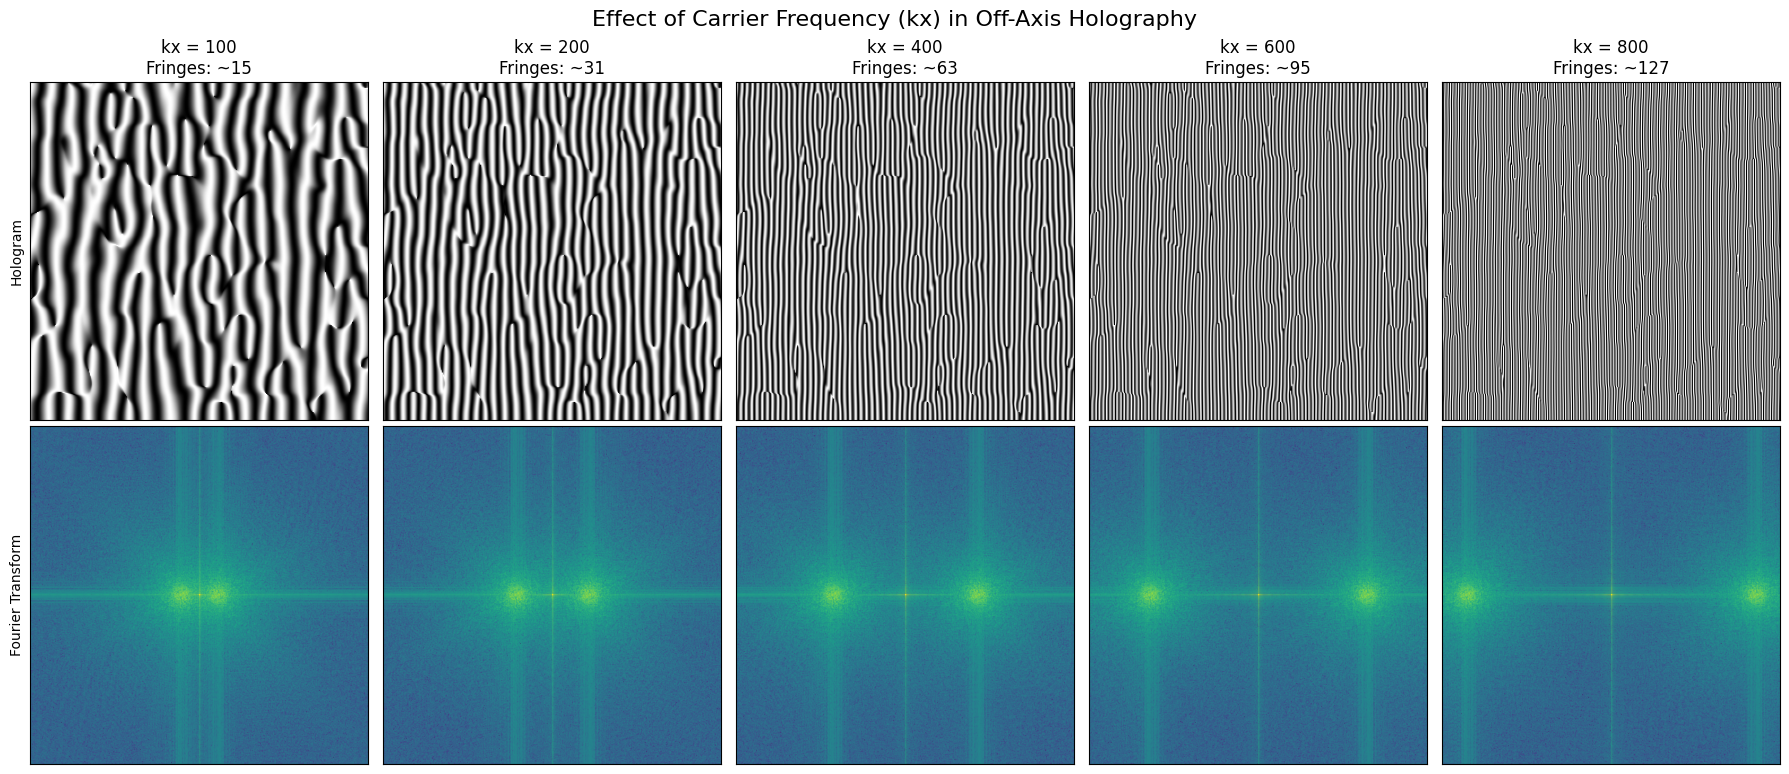

In [3]:
from matplotlib.colors import LogNorm
from modules.grid import create_spatial_grid, create_frequency_grid
from modules.holography import compute_fourier_transform, create_hologram
from modules.field_generation import generate_speckle_field, generate_reference_field
import numpy as np
import matplotlib.pyplot as plt

# Create grid
Nx, Ny = 300, 300
X, Y, xv, yv = create_spatial_grid(Nx, Ny)

# Fixed parameters
grain_size = 20

# Generate signal field (fixed for all experiments)
signal_field = generate_speckle_field(Nx, Ny, grain_size)

# Define different kx values to compare
kx_values = [100, 200, 400, 600, 800]

# Create figure
fig, axes = plt.subplots(2, len(kx_values), figsize=(18, 8))
fig.suptitle('Effect of Carrier Frequency (kx) in Off-Axis Holography', fontsize=16)

# Process each kx value
for i, kx in enumerate(kx_values):
    # Generate reference field with current kx
    reference_field = generate_reference_field(xv, yv, kx=kx)
    
    hologram = create_hologram(signal_field, reference_field)
    
    # Compute Fourier transform 
    ft = compute_fourier_transform(hologram, padding_factor= 2)
    
    # Plot hologram (interference pattern)
    axes[0, i].imshow(hologram, cmap='gray')
    axes[0, i].set_title(f'kx = {kx}\nFringes: ~{int(kx/(2*np.pi))}')
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])
    if i == 0:
        axes[0, i].set_ylabel('Hologram')
    
    # Plot Fourier spectrum
    extent = [-0.5*Nx, 0.5*Nx-1, -0.5*Ny, 0.5*Ny-1]
    axes[1, i].imshow(np.abs(ft), extent=extent, norm=LogNorm(vmin=0.1), cmap='viridis')
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])
    if i == 0:
        axes[1, i].set_ylabel('Fourier Transform')

plt.tight_layout()
plt.show()